# Tarea 5: Jugando con MNIST desde NumPy

## Introducción a MNIST y carga desde Keras

[MNIST](https://es.wikipedia.org/wiki/Base_de_datos_MNIST) es una base de datos clásica en el mundo del aprendizaje automático. Es una base de datos de dígitos escritos a mano que se utiliza para entrenar sistemas de reconocimiento de dígitos. La base de datos contiene 60,000 imágenes de entrenamiento y 10,000 imágenes de test.

Vamos a descargar esta base de datos desde Keras y a visualizar algunas de las imágenes.

Hay que tener en cuenta que, cuando queremos trabajar con imágenes, antes de nada tenemos que comprender en qué formato están almacenadas, y probablemente hacer un procesado de estas imágenes. En este caso, el *dataset* se nos presenta ya preprocesado, con las imágenes normalizadas en 28x28 píxeles y en escala de grises.

Cada píxel tiene un valor que representa la intensidad en escala de grises, entre 0 (blanco) y 255 (negro).

In [2]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-12-25 18:09:36.890137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 12s 1us/step


Keras nos devuelve una tupla con los datos de entrenamiento y los datos de test. Cada uno de estos conjuntos de datos es a su vez una tupla con las imágenes y las etiquetas asociadas a cada imagen. Podemos mostrar por ejemplo que `X_train` es un array de NumPy de 60,000 imágenes de 28x28 píxeles. Se trata por tanto de 3 dimensiones: 60,000 x 28 x 28.

In [3]:
print(type(X_train))
print(X_train.dtype) # uint8 (0-255)
print(X_train.shape) # (60000, 28, 28): 60000 images, 28x28 pixels

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)


Por su parte, podemos ver que `y_train` es un vector que contiene las etiquetas asociadas a cada imagen.

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Vamos a mostrar la primera de las imágenes (`X_train[0]`) escribiendo el valor de cada elemento del array en una cuadrícula:

In [5]:
def print_image_data_as_pixel_values(image):
    for i in range(28):
        for j in range(28):
            print(f"{image[i][j]:3}", end="")
        print()
        
print_image_data_as_pixel_values(X_train[0])


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

y de un modo más elegante, utilizando **matplotlib**:

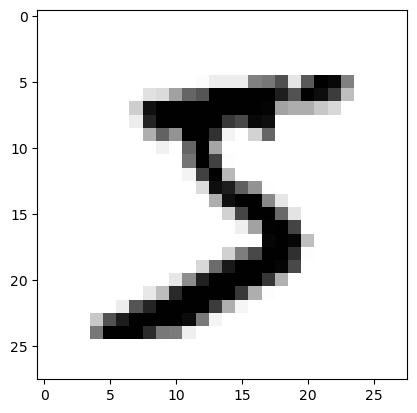

In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.show()
    
plot_image(X_train[0])

y su etiqueta correspondiente (`y_train[0]`):

In [7]:
y_train[0]

5

Viendo una cuadrícula con las primeras 100 imágenes:

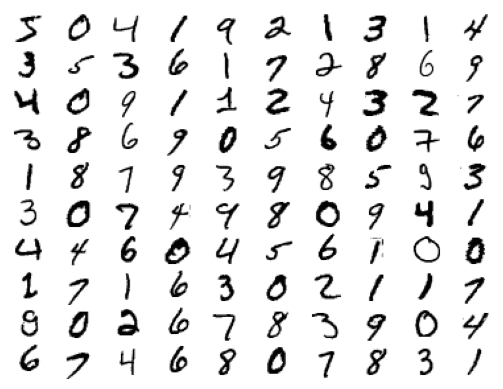

In [8]:
def print_matrix_first_100(data):
    for idx, image_data in enumerate(data[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(image_data, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

print_matrix_first_100(X_train)

## Ejercicios

Resuelve los siguientes ejercicios cada uno en su celda. Haz uso solo de la librería NumPy.

### Básicos

1. Crea una variable `matrix_first_100_labels` con las primeras 100 etiquetas en una matriz de 10x10 y muéstralas para cotejarlas con el anterior gráfico de sus correspondientes imágenes. 

In [9]:
import numpy as np

matrix_first_100_labels = y_train[:100].reshape(10, 10)

print(matrix_first_100_labels)


[[5 0 4 1 9 2 1 3 1 4]
 [3 5 3 6 1 7 2 8 6 9]
 [4 0 9 1 1 2 4 3 2 7]
 [3 8 6 9 0 5 6 0 7 6]
 [1 8 7 9 3 9 8 5 9 3]
 [3 0 7 4 9 8 0 9 4 1]
 [4 4 6 0 4 5 6 1 0 0]
 [1 7 1 6 3 0 2 1 1 7]
 [9 0 2 6 7 8 3 9 0 4]
 [6 7 4 6 8 0 7 8 3 1]]


2. Algunos modelos de *machine learning* requieren que los datos de entrada estén aplanados. En este caso eso significa que cada imagen esté en una única dimensión, o lo que es lo mismo, que cada imagen de 28x28 píxeles esté representada por un vector de 784 píxeles. Aplana las imágenes de entrenamiento y de test, devolviendo dos arrays de NumPy con las dimensiones 60,000 x 784 y 10,000 x 784 respectivamente que se llamen `X_train_flat` y `X_test_flat`.

In [10]:
D1, D2, D3 = X_train.shape

X_train_flat = X_train.reshape(D1, D2 * D3)

D1, D2, D3 = X_test.shape

X_test_flat = X_test.reshape(D1, D2 * D3)

print(X_train_flat.shape)

print(X_test_flat.shape)


(60000, 784)
(10000, 784)


3. Modifica la función `plot_image` con el que hemos visualizado la primera imagen (`X_train[0]`) para que funcione también recibiendo imágenes aplanadas (la misma función debe poder recibir imágenes de 28*28 o de 784). Comprueba que muestra correctamente mostrando (`X_train_flat[0]`).

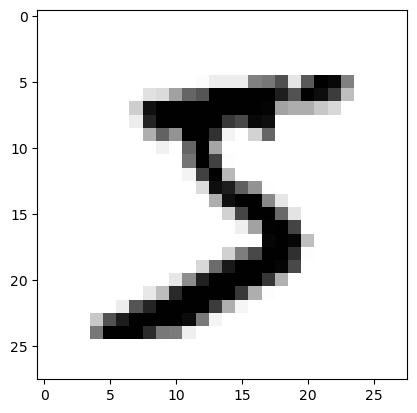

In [16]:
"""
Compruebo si la imagen es de una dimensión, si es de una hago un reshape para transformara a 2 dimensiones obteniendo la raíz cuadrada de la longitud del array.
"""
def plot_image(image):
    
   if len(image.shape) == 1:
        lado = int(image.shape[0] ** 0.5)
        image = image.reshape(lado, lado)

   plt.imshow(image, cmap="binary")
   plt.show()
    
plot_image(X_train_flat[0])

4. Comprueba que, para todas las imágenes, el pixel que está en la esquina inferior derecha está siempre a cero.

In [12]:
unicos, frecuencias = np.unique(X_train[:,-1,-1], return_counts=True)
print(f"Valores y ocurrencias de X_train: {dict(zip(unicos, frecuencias))}")

unicos, frecuencias = np.unique(X_test[:,-1,-1], return_counts=True)
print(f"Valores y ocurrencias de X_test: {dict(zip(unicos, frecuencias))}")

Valores y ocurrencias de X_train: {0: 60000}
Valores y ocurrencias de X_test: {0: 10000}


### One-hot encoding

5. Algunos modelos de *machine learning* requieren que las etiquetas sean codificadas en un formato *one-hot*. Esto significa que si tenemos 10 clases posibles, cada etiqueta se convierte en un vector de 10 elementos, con un 1 en la posición de la clase y 0 en el resto de posiciones. En este caso, como tenemos 10 dígitos posibles, necesitamos un vector de 10 elementos para cada etiqueta. O sea, si una imagen es un 3, la etiqueta será `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`, y si es un 9, la etiqueta será `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`.

Codifica las etiquetas de entrenamiento y de test en formato *one-hot*, devolviendo dos arrays de NumPy con las dimensiones 60,000 x 10 y 10,000 x 10 respectivamente que se llamen `y_train_onehot` y `y_test_onehot`.

In [13]:
# trabajo con y_train
print(len(y_train))

y_train_onehot = np.zeros((len(y_train), 10)) # genero un array de 60000x10 con ceros

print(y_train_onehot.shape)

for i in range(0, len(y_train)): # recorro el array de 60000
    y_train_onehot[i][y_train[i]] = 1 # en la posición i del array de 60000x10 pongo un 1 en la posición y_train[i]

print(y_train_onehot)

# trabajo con y_test
print(len(y_test))

y_test_onehot = np.zeros((len(y_test), 10)) # genero un array de 60000x10 con ceros

print(y_test_onehot.shape)

for i in range(0, len(y_test)): # recorro el array de 60000
    y_test_onehot[i][y_test[i]] = 1 # en la posición i del array de 60000x10 pongo un 1 en la posición y_test[i]

print(y_test_onehot)



#y_test_onehot

60000
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
10000
(10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Normalización

6. Muestra los siguientes valores:
    - Valor mínimo y máximo de los píxeles de las imágenes de entrenamiento.
    - Media y desviación típica (*standard deviation*) de los píxeles de las imágenes de entrenamiento.

In [14]:
print(f"Mínimo: {X_train.min()}")

print(f"Máximo: {X_train.max()}")

print(f"Media: {X_train.mean()}")

print(f"Desviación típica: {X_train.std()}")

Mínimo: 0
Máximo: 255
Media: 33.318421449829934
Desviación típica: 78.56748998339798


7. Normaliza las imágenes de entrenamiento de forma que los valores de los píxeles estén en el rango [0, 1]. Devuelve un array `X_train_norm` y muestra la primera imagen normalizada.

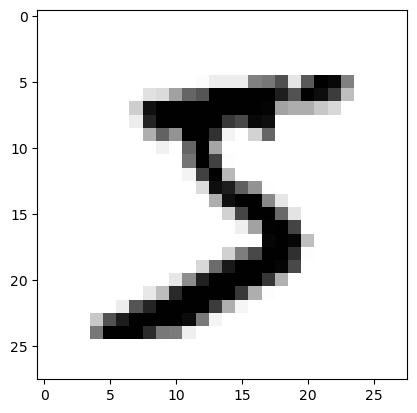

In [17]:
#tengo que obtener el valor mínimo y máximo de X_train y X_test para normalizar los datos
#la formula para normalizar es (X - min) / (max - min)
minimo = X_train.min()
maximo = X_train.max()
 
X_train_norm = (X_train - minimo) / (maximo - minimo)

plot_image(X_train_norm[0])

8. Crea las variables `pixel_norm_mean` y `pixel_norm_std` que contengan la media y la desviación típica de los píxeles de las imágenes normalizadas de **entrenamiento**. Muestra estos valores. Es posible que te los encuentres en el futuro.

In [18]:
pixel_norm_mean = X_train_norm.mean()

print(f"Media: {pixel_norm_mean}")

pixel_norm_std = X_train_norm.std()

print(f"Desviación típica: {pixel_norm_std}")

Media: 0.1306604762738429
Desviación típica: 0.3081078038564622


9. Estandariza las imágenes de entrenamiento y de test, de forma que tengan media 0 y desviación típica 1. Devuelve `X_train_standardized`.

> La **estandarización Z-score** (***standard score***) se calcula primero restando la media (para que ésta sea 0), y luego dividiendo por la **desviación típica** para que la distribución resultante tenga desviación típica 1:
>
> $$ X_{std} = \frac{X - \mu}{\sigma} $$
> 
> donde $X$ es el array de entrada, $X_{std}$ es el array estandarizado, $\mu$ es la media y $\sigma$ es la desviación estándar.

In [19]:
X_train_standardized = (X_train - X_train.mean()) / X_train.std()

10. Aplica el proceso de estandarización a `X_train_norm`. Devuelve `X_train_norm_standarized` y comprueba que todos sus valores son iguales que los de `X_train_standardized` (puedes usar `np.allclose()` ya que no serán exactamente iguales por la precisión de los cálculos en coma flotante).

In [20]:
X_train_norm_standarized = (X_train_norm - X_train_norm.mean()) / X_train_norm.std()

result = np.allclose(X_train_norm_standarized, X_train_standardized)
print(result) 

True


### *Data Augmentation*

11. Crea un array `X_train_noisy` que contenga las imágenes de entrenamiento con ruido gaussiano. 

> **El ruido gaussiano es un ruido aleatorio que sigue una distribución normal**. Investiga el uso de la función `np.random.normal` para añadir ruido a las imágenes.

- Añade ruido con media 0 y desviación típica de 50. 
- Utiliza la función `np.clip` para asegurarte de que los nuevos valores de los píxeles siguen dentro del rango [0, 255].

Muestra con ruido tanto la primera imagen como la matriz de las 100 primeras.

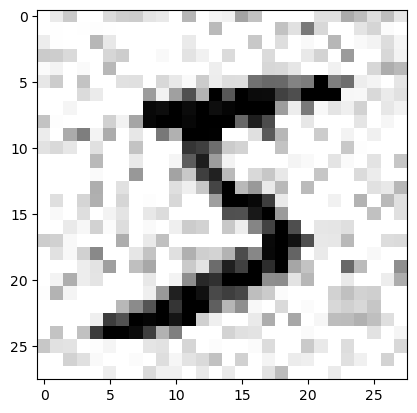

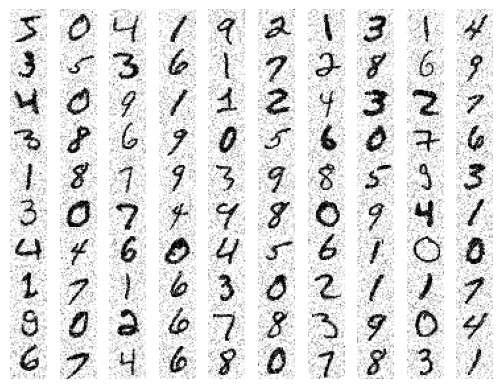

In [22]:
ruido = np.random.normal(loc=0, scale=50, size=X_train.shape)

X_train_noisy = X_train + ruido

X_train_noisy = X_train_noisy.clip(0, 255)

plot_image(X_train_noisy[0])

print_matrix_first_100(X_train_noisy)

12. Binarización
    - Crea una función `binarize_image` que binarice una imagen (convirtiendo los píxeles a 0 o 1). La función debe recibir un array de NumPy con una imagen y un valor de corte `threshold` a partir del cual se considera que un píxel es 1.
    - Crea un nuevo array `X_train_binarized` poniendo a 0 todos los píxeles que sean menores de 128 y a 1 todos los píxeles que sean mayores o iguales que 128. Prueba otros valores de corte.

13. Aplica el proceso de binarización a las imágenes con ruido creando un nuevo array `X_train_noisy_binarized`. Prueba distintos valores de `threshold` para ver cómo afecta a la imagen.

14. Crea una función `shift_image` que desplace una imagen en una dirección (arriba, abajo, izquierda, derecha) un número de píxeles dado. La función debe recibir un array de NumPy con una imagen, un valor de desplazamiento vertical `dy`y un valor de desplazamiento horizontal `dx`. Los valores positivos desplazarán hacia abajo y hacia la derecha, y los valores negativos hacia arriba y hacia la izquierda.

15. Crea un array `X_train_shifted_right_10` que contenga las imágenes de `X_train` desplazadas 10 píxeles a la derecha. Muestra las primeras 100 imágenes de este nuevo array para comprobar como al desplazar las imágenes se pierden píxeles.

16. Crea una función `find_limits` que reciba una imagen y devuelva los límites donde la imagen deja de ser todo 0s. Debe devolver una tupla con los valores `(top, bottom, left, right)` que serán las coordenadas de la región de la imagen donde hay píxeles diferentes de 0.

18. Crea una función `crop_image_limits` que reciba una imagen y la devuelva recortada a los límites calculados con la función `find_limits`.

19. Crea un array `X_train_shifted` que contenga las imágenes desplazando cada una en una dirección aleatoria un número de píxeles aleatorio pero garantizando que la imagen no se salga de los límites de la imagen original. Muestra las primeras 100 imágenes de este nuevo array.

20. Vamos a crear un conjunto de entrenamiento aumentado `X_train_augmented` añadiendo las siguientes transformaciones a las imágenes de entrenamiento:
    - Imágenes con ruido
    - Imágenes binarizadas
    - Imágenes desplazadas aleatoriamente